![logo](MAXWind_Logo.png "MAXWind logo")
https://www.owi-lab.be/maxwind

# UGent
## Exercise 2: Fatigue strength evolution

In this exercise, you will become acquainted with the process of estimating the degraded fatigue strength of two types of steel (S355 and 316L). The degradation happens as a consequence of corrosion pit forming on the surface of the material by being exposed to the North Sea environment.

1. Parameters that are characteristic of the material are provided.
2. The pit depth can be determined in the first step by knowing the maximum pit depth growth rate and the desired exposure duration. 
3. The pit width may then be calculated using a derived relationship between pit depth and pit width.
4. Finally, the model computes the material's present fatigue strength after a certain duration of exposure to the marine environment.

In [24]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import list_functions as lf

### 1. Material parameters

For the sake of this exercise, we will look at the fatigue strength evolution of two different grades of structural steel materials:

* S355 structural steel
* Carbon steel (potentially S375)

We will let you choose which material you would like to see the fatigue strength evolution for.

In [25]:
#Input material parameters as a Pandas DataFrame.

material_prm_df = pd.read_excel("Material parameters_COMBINED.xlsx")
material_prm_df.set_index('Material', inplace=True)
    

    
#Show material parameters
material_prm_df
#Headers
#Threshold stress intensity factor, Kth [MPa.m^0.5]
#Fatigue limit of the material, sigma_limit [MPa]
#Elastic modulus of the material, E [GPa]
#Poisson ratio, v [-]
#Average grain size of the microstructure (base material), D [mm]

,Kth,sigma_limit,E,v,D
Material,,,,,
S355,13.00,345,216.72,0.29,0.01
Carbon steel,5.94,279,212.80,0.33,0.01


####  You can choose which material you want to see the fatigue strength evolution for.

In [26]:
#Choice of material for analysis
# "S355" OR "Carbon steel"
choice_material = "S355" 
print("The choice of material for analysis is: "+choice_material)

The choice of material for analysis is: S355


### 2. Pit dimensions - pit depth

![pit_size](pit_size.png "pit_size")

Based on [literature](https://doi.org/10.1179/000705988798270730), we can estimate pit depth for specific exposure times. 

For the sake of simplification, from the linked literature above, pit depth can be assumed to grow linearly at 0.409 mm per year of exposure

In [27]:
#Pit depth evolution vs exposure time
pit_depth_growth_rate = 0.409 #mm/year
exposure_time = np.arange(0,8.0,0.5)
pit_depth = exposure_time * pit_depth_growth_rate
pit_geometry_df = pd.DataFrame(zip(exposure_time, pit_depth), columns = ['exposure time','pit depth'])
pit_geometry_df.set_index('exposure time', inplace=True)

#Headers
#Exposure time [years]
# Pit depth [mm]
pit_geometry_df

,pit depth
exposure time,
0.0,0.0000
0.5,0.2045
1.0,0.4090
1.5,0.6135
2.0,0.8180
2.5,1.0225
3.0,1.2270
3.5,1.4315
4.0,1.6360


### 3. Pit dimensions - pit width

The pit width may then be calculated using a derived relationship between pit depth and pit width (based on actual measurements of corrosion pits from a sample submerged in the North Sea).

In [28]:
#Adding pit width to pit geometry dataframe
pit_geometry_df['pit width'] = (2.2*pit_geometry_df['pit depth'] + 1.062) #mm
#setting first value as zero
pit_geometry_df['pit width'].iloc[0] = 0
#Show Dataframe
pit_geometry_df

,pit depth,pit width
exposure time,,
0.0,0.0000,0.0000
0.5,0.2045,1.5119
1.0,0.4090,1.9618
1.5,0.6135,2.4117
2.0,0.8180,2.8616
2.5,1.0225,3.3115
3.0,1.2270,3.7614
3.5,1.4315,4.2113
4.0,1.6360,4.6612


#### Plot evolution of pit geometry

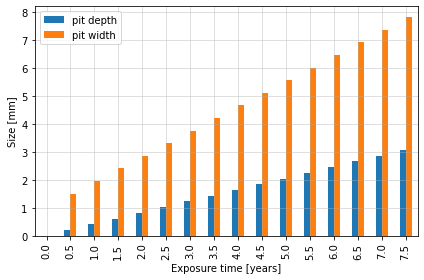

In [29]:
#Plot evolution of pit geometry
ax = pit_geometry_df.plot.bar()
plt.ylabel('Size [mm]', size=10)
plt.xlabel('Exposure time [years]', size=10)
plt.tight_layout()
plt.grid(True,alpha=0.5)

### 4. Fatigue strength evolution

Finally, the model computes the material's present fatigue strength after a certain duration of exposure to the marine environment.

Unfortunately, the model is computationally heavy, and, in our case, is currently implemented in MATLAB (it is in the process of being translated to Python). Thus, we will not be able to demonstrate "behind-the-scenes" calculations. However, we have performed a polynomial fit through the data (valid for exposure time of 0 - 7.5 years) representing the fatigue strength evolution for each specific material.

In [30]:
#Calculating fatigue strength based on relation (exported to function written in another file)
pit_geometry_df['Fatigue strength'] = lf.fatigue_strength_calc(pit_geometry_df,choice_material)

#Show Dataframe
pit_geometry_df

,pit depth,pit width,Fatigue strength
exposure time,,,
0.0,0.0000,0.0000,343.120000
0.5,0.2045,1.5119,235.303430
1.0,0.4090,1.9618,188.753600
1.5,0.6135,2.4117,171.175886
2.0,0.8180,2.8616,164.241600
2.5,1.0225,3.3115,159.266680
3.0,1.2270,3.7614,153.607000
3.5,1.4315,4.2113,147.770311
4.0,1.6360,4.6612,143.244800


In [31]:
#If you would like to print a specific value of fatigue strength for a certain exposure time.
s = pit_geometry_df['Fatigue strength']

#Exposure time between 0 to 7.5 with the step of 0.5
choice_exposure_time = 7.5 ##your choice here
b = 2*choice_exposure_time
b = int(b)
print("The fatigue strength for an exposure time of: "+str(choice_exposure_time)+" years is: "+str(round(s.iloc[b],2))+" MPa")

The fatigue strength for an exposure time of: 7.5 years is: 138.14 MPa


In [32]:
#Normalising fatigue strength
pit_geometry_df['Normalised fatigue strength'] = pit_geometry_df['Fatigue strength'] / pit_geometry_df['Fatigue strength'].max()

#Show Dataframe
pit_geometry_df

,pit depth,pit width,Fatigue strength,Normalised fatigue strength
exposure time,,,,
0.0,0.0000,0.0000,343.120000,1.000000
0.5,0.2045,1.5119,235.303430,0.685776
1.0,0.4090,1.9618,188.753600,0.550110
1.5,0.6135,2.4117,171.175886,0.498881
2.0,0.8180,2.8616,164.241600,0.478671
2.5,1.0225,3.3115,159.266680,0.464172
3.0,1.2270,3.7614,153.607000,0.447677
3.5,1.4315,4.2113,147.770311,0.430667
4.0,1.6360,4.6612,143.244800,0.417477


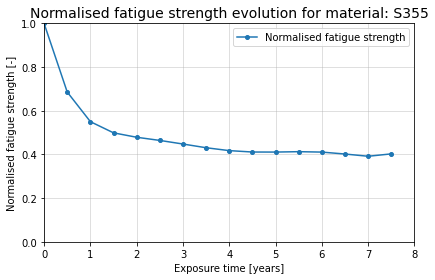

In [33]:
#Plotting Fatigue strength evolution vs exposure time
ax = pit_geometry_df.plot.line(y='Normalised fatigue strength',marker = 'o', markersize = 4)
plt.ylabel('Normalised fatigue strength [-]', size=10)
plt.xlabel('Exposure time [years]', size=10)
ax.set_ylim([0.,1.])
ax.set_xlim([0.0,8.0])
ax.set_title('Normalised fatigue strength evolution for material: '+choice_material,size = 14)
plt.tight_layout()
plt.grid(True,alpha=0.5)

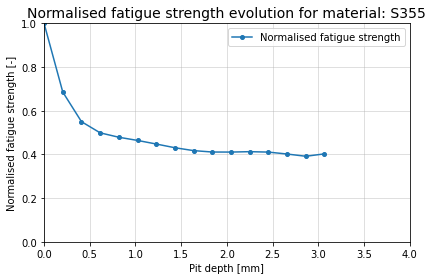

In [34]:
#Plotting Fatigue strength evolution vs pit depth
ax = pit_geometry_df.plot.line(x='pit depth', y='Normalised fatigue strength',marker = 'o', markersize = 4)
plt.ylabel('Normalised fatigue strength [-]', size=10)
plt.xlabel('Pit depth [mm]', size=10)
ax.set_ylim([0.,1.])
ax.set_xlim([0.0,4.0])
ax.set_title('Normalised fatigue strength evolution for material: '+choice_material,size = 14)
plt.tight_layout()
plt.grid(True,alpha=0.5)